In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set working directory
import os
path='/content/drive/My Drive/Colab Notebooks'
os.chdir(path)

Mounted at /content/drive


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0731
Epoch 2/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0188
Epoch 3/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0139
Epoch 4/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0133
Epoch 5/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0120
Epoch 6/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0125
Epoch 7/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0114
Epoch 8/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0108
Epoch 9/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0102
Epoch 10/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0106
Epoch 11/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0105
Epoch 12/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0118
Epoch 13/100


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (528, 60, 1)

(528, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

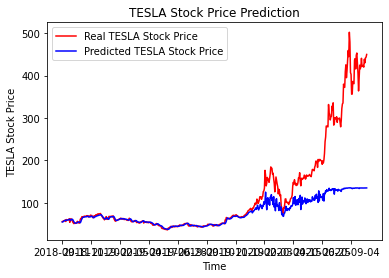

In [ ]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# Build the input features with lag of 7 days

In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 7):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (76, 60, 1)

(76, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

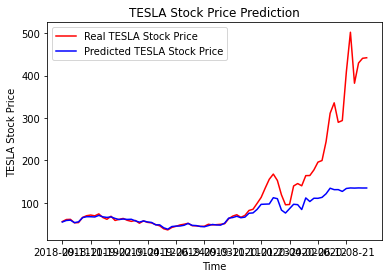

In [ ]:
# Visualising the results
plt.plot(df.loc[800::7, 'Date'],dataset_test.values[::7], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::7, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,76,7))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# Build the input features with lag of 14 days

In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (38, 60, 1)

(38, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

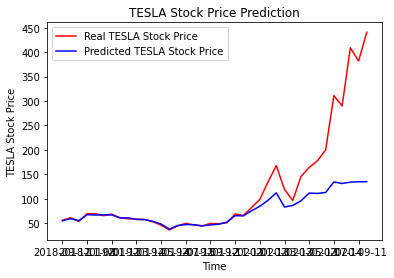

In [ ]:
# Visualising the results
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# Model with lag of 7 days and 5 hidden layers and dropout 0.2

In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0585
Epoch 2/100
24/24 [==============================] - 4s 146ms/step - loss: 0.0223
Epoch 3/100
24/24 [==============================] - 4s 147ms/step - loss: 0.0157
Epoch 4/100
24/24 [==============================] - 3s 143ms/step - loss: 0.0137
Epoch 5/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0138
Epoch 6/100
24/24 [==============================] - 3s 139ms/step - loss: 0.0133
Epoch 7/100
24/24 [==============================] - 4s 148ms/step - loss: 0.0129
Epoch 8/100
24/24 [==============================] - 4s 150ms/step - loss: 0.0121
Epoch 9/100
24/24 [==============================] - 4s 146ms/step - loss: 0.0121
Epoch 10/100
24/24 [==============================] - 3s 142ms/step - loss: 0.0107
Epoch 11/100
24/24 [==============================] - 3s 142ms/step - loss: 0.0110
Epoch 12/100
24/24 [==============================] - 3s 144ms/step - loss: 0.0108
Epoch 13/100


In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 7):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_2 = model2.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

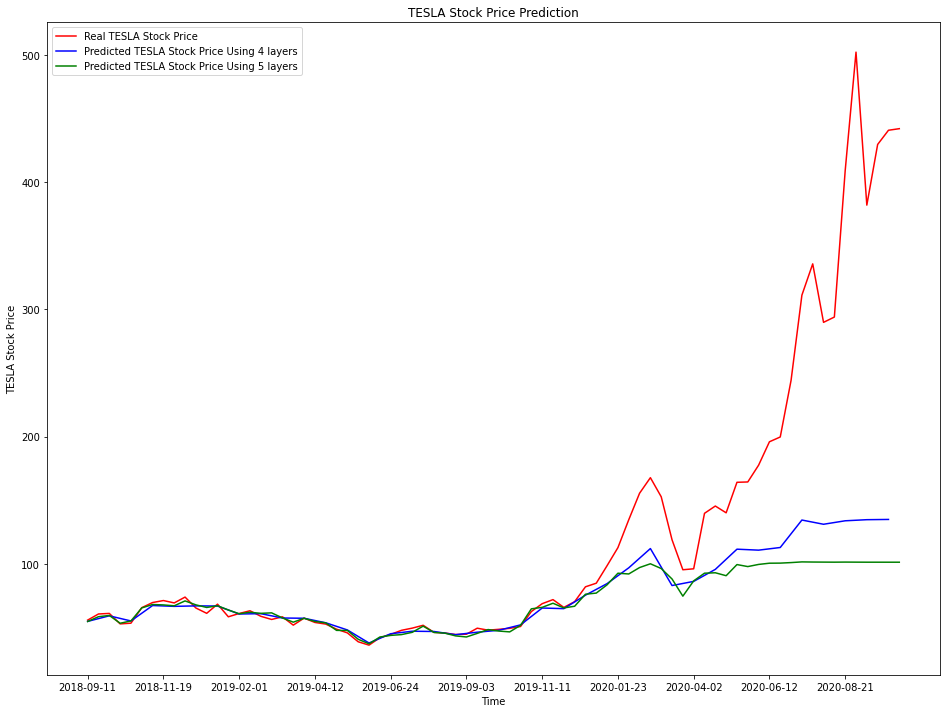

In [ ]:
# Visualising the results
plt.plot(df.loc[800::7, 'Date'],dataset_test.values[::7], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price Using 4 layers')
plt.plot(df.loc[800::7, 'Date'],predicted_stock_price_2, color = 'green',
         label = 'Predicted TESLA Stock Price Using 5 layers')
plt.xticks(np.arange(0,76,7))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

# Model with lag of 7 days and 4 hidden layers and dropout 0.1

In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model3 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model3.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50))
model3.add(Dropout(0.1))
# Adding the output layer
model3.add(Dense(units = 1))

# Compiling the RNN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model3.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0571
Epoch 2/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0174
Epoch 3/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0111
Epoch 4/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0110
Epoch 5/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0126
Epoch 6/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0101
Epoch 7/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0101
Epoch 8/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0102
Epoch 9/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0086
Epoch 10/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0086
Epoch 11/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0085
Epoch 12/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0079
Epoch 13/100


In [ ]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 7):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_3 = model3.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

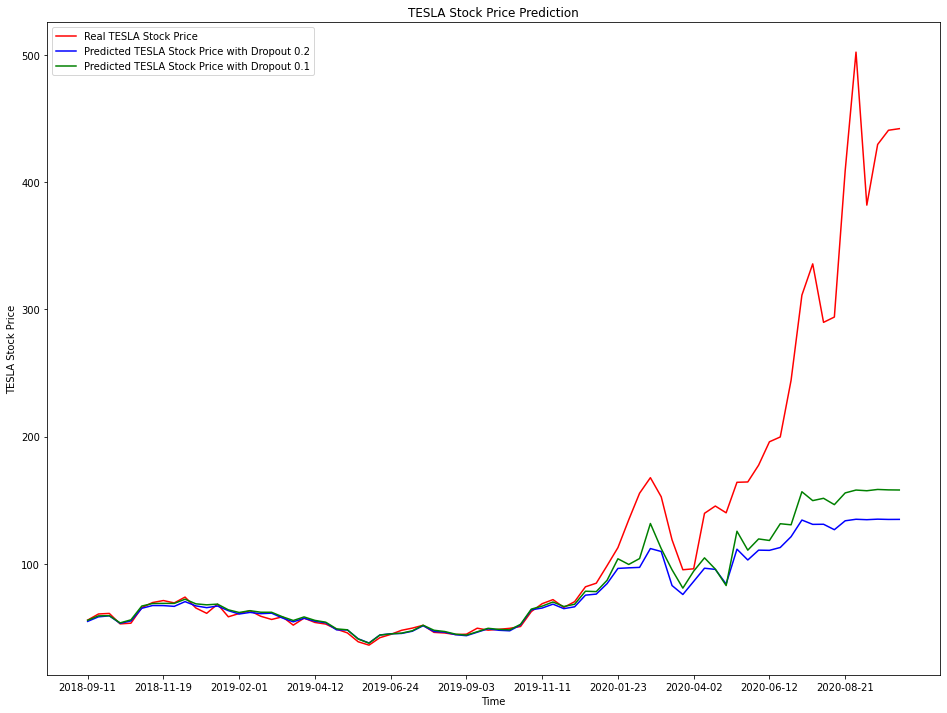

In [ ]:
# Visualising the results
plt.plot(df.loc[800::7, 'Date'],dataset_test.values[::7], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::7, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price with Dropout 0.2')
plt.plot(df.loc[800::7, 'Date'],predicted_stock_price_3, color = 'green',
         label = 'Predicted TESLA Stock Price with Dropout 0.1')
plt.xticks(np.arange(0,76,7))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

# Predictions for future 2 weeks using model with lag of 7 days and 5 hidden layers and dropout 0.2

In [ ]:
## predict price in two weeks
# calculate date difference
from datetime import datetime
cur_day = datetime(2020, 10, 14)
end_day = datetime(2020, 10, 28)
time_horizon = (end_day - cur_day).days

In [ ]:
# get the date of following two weeks
dates = df['Date']
last_date = '2020-10-15'
timestamp_list = pd.date_range(last_date, periods = time_horizon).tolist()
datestring_list = [i.strftime("%Y-%m-%d") for i in timestamp_list] 
datestring_list

['2020-10-15',
 '2020-10-16',
 '2020-10-17',
 '2020-10-18',
 '2020-10-19',
 '2020-10-20',
 '2020-10-21',
 '2020-10-22',
 '2020-10-23',
 '2020-10-24',
 '2020-10-25',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28']

In [ ]:
# delete weekends
index = [2,3,9,10]
to_del = object()
for ind in index:
    datestring_list[ind] = to_del
for i in index:
    datestring_list.remove(to_del)
datestring_list

['2020-10-15',
 '2020-10-16',
 '2020-10-19',
 '2020-10-20',
 '2020-10-21',
 '2020-10-22',
 '2020-10-23',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28']

In [ ]:
len(datestring_list)

10

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
#get the test data
for i in range(60, 538):
    X_test.append(inputs[i-60:i, 0])

# X_test.shape[0] has 478 values, we want use the last 10 value to predict 
del X_test[0:468]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(10, 60, 1)


In [ ]:
predicted_stock_price = model2.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

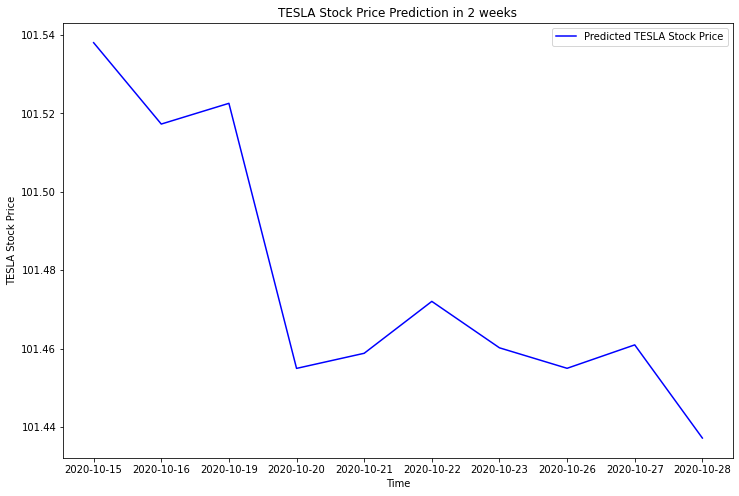

In [ ]:
# Visualising the results
plt.plot(datestring_list,predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,10))
plt.title('TESLA Stock Price Prediction in 2 weeks')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(12,8)
plt.show()